In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import sympy as sy
np.set_printoptions(precision=4)

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation

In [2]:
g = 9.81

def system(y, t):
    i = 0
    x = y[0]
    ya = y[1]
    v = y[2]
    
    #calculate tangent vector
    T = Jlam(x).flatten() / np.linalg.norm(Jlam(x))
    
    #calculate normal vector
    N = np.array([-T[1], T[0]])
    
    #find angle of ascent
    angle = np.arctan2(N[0], N[1])
    
    #find vdot and pdot
    vdot = u[i] + g*np.sin(angle)
    pdot = v*T
    return tuple(pdot.flatten()) + (vdot,)

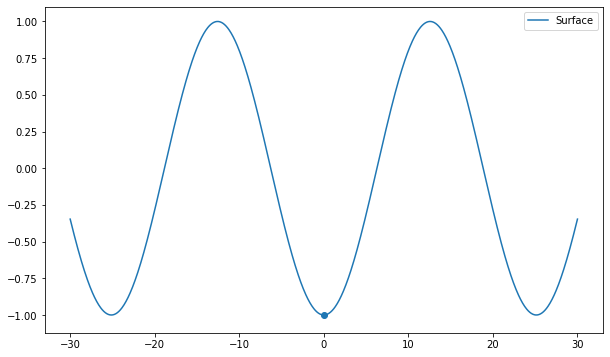

In [17]:
#set up surface
x = sy.symbols('x') 
M = sy.Matrix([x, -sy.cos(x/4)])
J = M.jacobian([x])
Jlam = sy.lambdify(x, J)
Mlam = sy.lambdify(x, M)

#set up controls
N = 200
u = np.zeros(N)
t_array = np.linspace(0, 20, N)

#x0, y0, v0
y0 = np.array([0, -1, 4])

#solve
sol = odeint(system, y0, t_array)

#plot and animate
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
x = np.linspace(-30,30,1000)
ax.plot(x, Mlam(x)[1,0], label="Surface")
ax.legend(loc='best')

dot   = ax.scatter(sol[0,0], sol[0,1])
line, = ax.plot(sol[:1,0], sol[:1,1], label="Movement")

def update(i):
    line.set_data(sol[:i,0], sol[:i,1])
    dot.set_offsets(sol[i,:2])

a = FuncAnimation(fig, update, frames=N, interval=50, repeat=False)
a.save('sim2D.mp4')